In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [2]:
dataset =pd.read_csv('Accu_Dataset.csv')
print(dataset)

     Type of Accu  Voltage of Accu  Accu Life (year)  Price of Accu
0    Kijo JDG12_1            11.20                 1          12000
1    Kijo JDG12_2            12.30                 2          13000
2    Kijo JDG12_3            10.70                 2          10000
3    Kijo JDG12_4            12.40                 4          11500
4    Kijo JDG12_5            12.50                 2          10500
5    Kijo JDG12_6            13.00                 1          10050
6    Kijo JDG12_7            12.40                 3          12500
7    Kijo JDG12_8            11.50                 3          13500
8    Kijo JDG12_9            11.80                 3          12750
9   Kijo JDG12_10            10.50                 2          12500
10  Kijo JDG12_11            10.80                 3          13500
11  Kijo JDG12_12            13.00                 1          10500
12  Kijo JDG12_13            12.51                 4          10000
13  Kijo JDG12_14            11.95              

In [3]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type of Accu      25 non-null     object 
 1   Voltage of Accu   25 non-null     float64
 2   Accu Life (year)  25 non-null     int64  
 3   Price of Accu     25 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 928.0+ bytes


,Voltage of Accu,Accu Life (year),Price of Accu
count,25.000000,25.000000,25.000000
mean,11.931600,2.240000,12466.000000
std,0.765292,1.011599,1640.739163
min,10.500000,1.000000,10000.000000
25%,11.500000,1.000000,11500.000000
50%,11.950000,2.000000,12500.000000
75%,12.500000,3.000000,13500.000000
max,13.000000,4.000000,15100.000000


In [4]:
#data of voltage
data_voltage = np.array(dataset)
data_voltage = data_voltage[:,[0,1]]
print("index = 0 Type of Accu, 1 = Voltage of Accu")
pd.DataFrame(data_voltage)

index = 0 Type of Accu, 1 = Voltage of Accu


,0,1
0,Kijo JDG12_1,11.2
1,Kijo JDG12_2,12.3
2,Kijo JDG12_3,10.7
3,Kijo JDG12_4,12.4
4,Kijo JDG12_5,12.5
5,Kijo JDG12_6,13.0
6,Kijo JDG12_7,12.4
7,Kijo JDG12_8,11.5
8,Kijo JDG12_9,11.8
9,Kijo JDG12_10,10.5


In [5]:
#data of Accu life
data_life = np.array(dataset)
data_life = data_life[:,[0,2]]
print("index = 0 Type of Accu, 1 = Accu Life")
pd.DataFrame(data_life)

index = 0 Type of Accu, 1 = Accu Life


,0,1
0,Kijo JDG12_1,1
1,Kijo JDG12_2,2
2,Kijo JDG12_3,2
3,Kijo JDG12_4,4
4,Kijo JDG12_5,2
5,Kijo JDG12_6,1
6,Kijo JDG12_7,3
7,Kijo JDG12_8,3
8,Kijo JDG12_9,3
9,Kijo JDG12_10,2


In [6]:
#data of Price of Accu
data_price = np.array(dataset)
data_price = data_price[:,[0,3]]
print("index = 0 Type of Accu, 1 = Price of Accu")
pd.DataFrame(data_price)

index = 0 Type of Accu, 1 = Price of Accu


,0,1
0,Kijo JDG12_1,12000
1,Kijo JDG12_2,13000
2,Kijo JDG12_3,10000
3,Kijo JDG12_4,11500
4,Kijo JDG12_5,10500
5,Kijo JDG12_6,10050
6,Kijo JDG12_7,12500
7,Kijo JDG12_8,13500
8,Kijo JDG12_9,12750
9,Kijo JDG12_10,12500


In [7]:
#data of Voltage - print per voltage
for i in range(25):
    j = i+1
    x_Volt = np.sum(data_voltage[i:j,1], axis=0)
    print(f'Life_{i+1} :', x_Volt)


Life_1 : 11.2
Life_2 : 12.3
Life_3 : 10.7
Life_4 : 12.4
Life_5 : 12.5
Life_6 : 13.0
Life_7 : 12.4
Life_8 : 11.5
Life_9 : 11.8
Life_10 : 10.5
Life_11 : 10.8
Life_12 : 13.0
Life_13 : 12.51
Life_14 : 11.95
Life_15 : 11.81
Life_16 : 11.66
Life_17 : 12.3
Life_18 : 12.75
Life_19 : 11.51
Life_20 : 10.51
Life_21 : 12.55
Life_22 : 12.9
Life_23 : 12.44
Life_24 : 11.4
Life_25 : 11.9


In [8]:
#data of Life- print per Life
for i in range(25):
    j = i+1
    x_Life = np.sum(data_life[i:j,1], axis=0)
    print(f'Life_{i+1} :', x_Life)


Life_1 : 1
Life_2 : 2
Life_3 : 2
Life_4 : 4
Life_5 : 2
Life_6 : 1
Life_7 : 3
Life_8 : 3
Life_9 : 3
Life_10 : 2
Life_11 : 3
Life_12 : 1
Life_13 : 4
Life_14 : 1
Life_15 : 3
Life_16 : 2
Life_17 : 1
Life_18 : 2
Life_19 : 3
Life_20 : 4
Life_21 : 1
Life_22 : 1
Life_23 : 2
Life_24 : 2
Life_25 : 3


In [9]:
#data of Price- print per Price
for i in range(25):
    j = i+1
    x_Price = np.sum(data_price[i:j,1], axis=0)
    print(f'Price_{i+1} :', x_Price)

Price_1 : 12000
Price_2 : 13000
Price_3 : 10000
Price_4 : 11500
Price_5 : 10500
Price_6 : 10050
Price_7 : 12500
Price_8 : 13500
Price_9 : 12750
Price_10 : 12500
Price_11 : 13500
Price_12 : 10500
Price_13 : 10000
Price_14 : 14500
Price_15 : 14750
Price_16 : 15100
Price_17 : 12500
Price_18 : 12000
Price_19 : 10500
Price_20 : 12500
Price_21 : 12500
Price_22 : 15000
Price_23 : 15000
Price_24 : 13500
Price_25 : 11500


In [10]:
##Voltage range
x_Volt = np.arange(10.5, 13.5, .625)
print(x_Volt)
x_Life = np.arange(0, 5, 1)
print(x_Life)
x_Price = np.arange(10000, 15000, 1700)
print(x_Price)


[10.5   11.125 11.75  12.375 13.   ]
[0 1 2 3 4]
[10000 11700 13400]


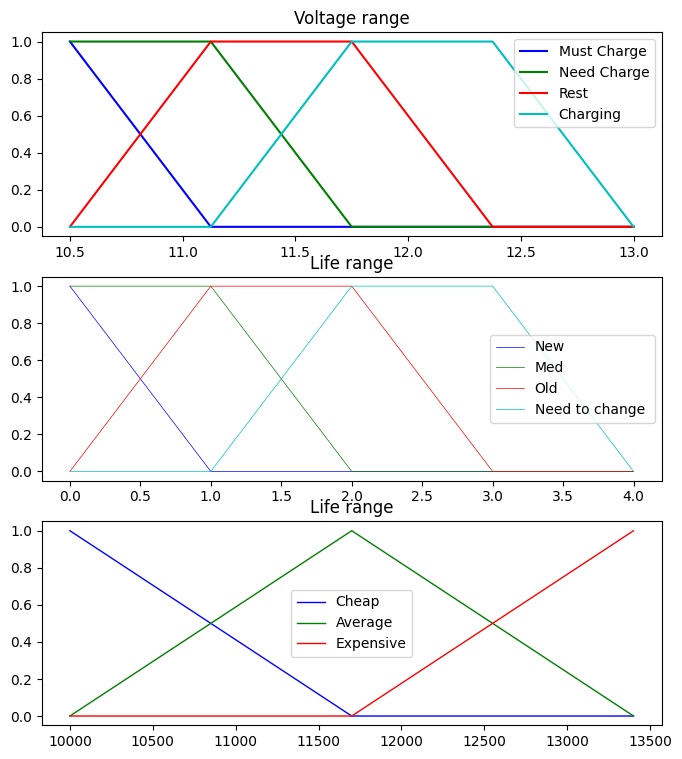

In [13]:
# Generate fuzzy membership functions
#for voltage range
qual_mustcharge = fuzz.trapmf(x_Volt, [10.5, 10.5, 10.5, 11.125])
qual_needcharge = fuzz.trapmf(x_Volt, [10.5, 10.5, 11.125, 11.75])
qual_rest = fuzz.trapmf(x_Volt, [10.5, 11.125, 11.75, 12.375])
qual_charging = fuzz.trapmf(x_Volt, [11.125, 11.75, 12.375, 13])

#for Accu life
qual_new = fuzz.trapmf(x_Life, [0, 0, 0, 1])
qual_med = fuzz.trapmf(x_Life, [0, 0, 1, 2])
qual_old = fuzz.trapmf(x_Life, [0, 1, 2, 3])
qual_ntc = fuzz.trapmf(x_Life, [1, 2, 3, 4])

#for Accu Price
qual_low = fuzz.trimf(x_Price, [10000, 10000, 11700])
qual_avg = fuzz.trimf(x_Price, [10000, 11700, 13400])
qual_exp = fuzz.trimf(x_Price, [11700, 13400, 15000])
fig, (ax0, ax1, ax2)= plt.subplots(nrows=3, figsize=(8, 9))

# Visualize these universes and membership functions
#for voltage range
ax0.plot(x_Volt, qual_mustcharge, 'b', linewidth=1.5, label='Must Charge')
ax0.plot(x_Volt, qual_needcharge, 'g', linewidth=1.5, label='Need Charge')
ax0.plot(x_Volt, qual_rest, 'r', linewidth=1.5, label='Rest')
ax0.plot(x_Volt, qual_charging, 'c', linewidth=1.5, label='Charging')

ax0.set_title('Voltage range')
ax0.legend()

#for life range
ax1.plot(x_Life, qual_new, 'b', linewidth=0.5, label='New')
ax1.plot(x_Life, qual_med, 'g', linewidth=0.5, label='Med')
ax1.plot(x_Life, qual_old, 'r', linewidth=0.5, label='Old')
ax1.plot(x_Life, qual_ntc, 'c', linewidth=0.5, label='Need to change ')

ax1.set_title('Life range')
ax1.legend()

#for Accu Price
ax2.plot(x_Price, qual_low, 'b', linewidth=1, label='Cheap')
ax2.plot(x_Price, qual_avg, 'g', linewidth=1, label='Average')
ax2.plot(x_Price, qual_exp, 'r', linewidth=1, label='Expensive')

ax2.set_title('Life range')
ax2.legend()

Rule application
what happens if it is given a value outside of the specified data?\
Voltage = 12.1
life = 1.5
price = 10900

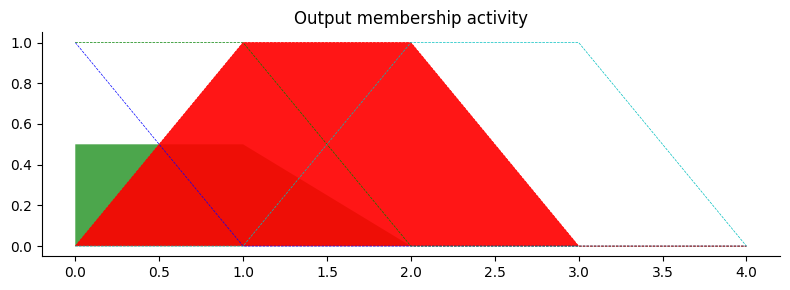

In [25]:
#we create the fuzz.interp_membership
#because the data we submit dont exist on our universe
qual_lvl_mustcharge = fuzz.interp_membership(x_Volt, qual_mustcharge, 12.1)
qual_lvl_needcharge = fuzz.interp_membership(x_Volt, qual_needcharge, 12.1)
qual_lvl_rest = fuzz.interp_membership(x_Volt, qual_rest, 12.1)
qual_lvl_charging = fuzz.interp_membership(x_Volt, qual_charging, 12.1)

qual_lvl_new = fuzz.interp_membership(x_Life, qual_new, 1.5)
qual_lvl_med = fuzz.interp_membership(x_Life, qual_med, 1.5)
qual_lvl_old = fuzz.interp_membership(x_Life, qual_old, 1.5)
qual_lvl_ntc = fuzz.interp_membership(x_Life, qual_ntc, 1.5)



tip_activation_1 = np.fmin(active_rule1, qual_new)  
active_rule1 = np.fmax(qual_lvl_mustcharge, qual_lvl_new)

tip_activation_2= np.fmin(active_rule2, qual_med) 
active_rule2 = np.fmax(qual_lvl_needcharge, qual_lvl_med)
   
active_rule3 = np.fmax(qual_lvl_rest, qual_lvl_old)
tip_activation_3 = np.fmin(active_rule3, qual_old)

active_rule4 = np.fmax(qual_lvl_charging, qual_lvl_ntc)
tip_activation_4= np.fmin(active_rule4, qual_ntc) 

tip0 = np.zeros_like(x_Life)


# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_Life, tip0, tip_activation_1, facecolor='b', alpha=0.7)
ax0.plot(x_Life, qual_new, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_Life, tip0, tip_activation_2, facecolor='g', alpha=0.7)
ax0.plot(x_Life, qual_med, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_Life, tip0, tip_activation_3, facecolor='r', alpha=0.7)
ax0.plot(x_Life, qual_old, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_Life, tip0, tip_activation_3, facecolor='r', alpha=0.7)
ax0.plot(x_Life, qual_ntc, 'c', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')


for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

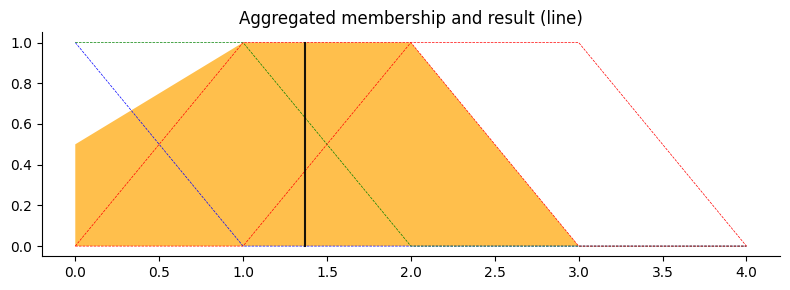

In [29]:
# Aggregate all three output membership functions together
aggregated = np.fmax(tip_activation_1,
                     np.fmax(tip_activation_2, tip_activation_3,tip_activation_4 ))

# Calculate defuzzified result
tip = fuzz.defuzz(x_Life, aggregated, 'centroid')
tip_activation = fuzz.interp_membership(x_Life, aggregated, tip)  # for plot

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_Life, qual_new, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_Life, qual_med, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_Life, qual_old, 'r', linewidth=0.5, linestyle='--')
ax0.plot(x_Life, qual_ntc, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_Life, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()